In [11]:
# import standard stuff

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip         # reading compressed files.
import ast          # evaluating literal expressions

# Adjusting some visuals

pd.set_option('display.max_colwidth', 100)  # Set the maximum width of a column to display (None for unlimited)

pd.set_option('display.max_rows', 10)  # Set the maximum number of rows to display

pd.set_option('display.max_columns', None)  # Set the maximum number of columns to display (None for unlimited)

In [12]:
# first tried to open gz file with the precieding procedure. It was impossible due to falied encoding.
# Introducing gzip and ast solved the problem.

# both user_reviews and users_items are in the same situation, so i put the open procedure inside a function:


def open_jsongz(path):

    rows = []

    with gzip.open(path, 'rt', encoding='utf-8') as file:
        for line in file.readlines():
            rows.append(ast.literal_eval(line)) # is used to safely interpret the content of each line as a Python literal (likely a dictionary).

    return  pd.DataFrame(rows)

user_reviews = open_jsongz('../data/user_reviews.json.gz')

In [13]:
user_reviews.isna().sum()

user_id     0
user_url    0
reviews     0
dtype: int64

In [14]:
user_reviews.drop('user_url', axis=1, inplace=True)

In [15]:
user_reviews

,user_id,reviews
0,76561197970982479,"[{'funny': '', 'posted': 'Posted November 5, 2011.', 'last_edited': '', 'item_id': '1250', 'help..."
1,js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014.', 'last_edited': '', 'item_id': '251610', 'helpf..."
2,evcentric,"[{'funny': '', 'posted': 'Posted February 3.', 'last_edited': '', 'item_id': '248820', 'helpful'..."
3,doctr,"[{'funny': '', 'posted': 'Posted October 14, 2013.', 'last_edited': '', 'item_id': '250320', 'he..."
4,maplemage,"[{'funny': '3 people found this review funny', 'posted': 'Posted April 15, 2014.', 'last_edited'..."
...,...,...
25794,76561198306599751,"[{'funny': '', 'posted': 'Posted May 31.', 'last_edited': '', 'item_id': '261030', 'helpful': '0..."
25795,Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'last_edited': '', 'item_id': '730', 'helpful': '0 o..."
25796,76561198310819422,"[{'funny': '1 person found this review funny', 'posted': 'Posted June 23.', 'last_edited': '', '..."
25797,76561198312638244,"[{'funny': '', 'posted': 'Posted July 21.', 'last_edited': '', 'item_id': '233270', 'helpful': '..."


In [16]:
reviews = []
columns_names = ['user_id','posted','item_id','review', 'recommend']

def get_data(row):
    for user_reviews in row['reviews']:
        reviews.append([row[columns_names[0]],user_reviews[columns_names[1]], user_reviews[columns_names[2]], user_reviews[columns_names[3]], user_reviews[columns_names[4]]])

user_reviews.apply(get_data, axis=1)

sentiment = pd.DataFrame(reviews, columns=columns_names)
sentiment

,user_id,posted,item_id,review,recommend
0,76561197970982479,"Posted November 5, 2011.",1250,"Simple yet with great replayability. In my opinion does ""zombie"" hordes and team work better tha...",True
1,76561197970982479,"Posted July 15, 2011.",22200,It's unique and worth a playthrough.,True
2,76561197970982479,"Posted April 21, 2011.",43110,Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game i...,True
3,js41637,"Posted June 24, 2014.",251610,"I know what you think when you see this title ""Barbie Dreamhouse Party"" but do not be intimidate...",True
4,js41637,"Posted September 8, 2013.",227300,"For a simple (it's actually not all that simple but it can be!) truck driving Simulator, it is q...",True
...,...,...,...,...,...
59300,76561198312638244,Posted July 10.,70,a must have classic from steam definitely worth buying.,True
59301,76561198312638244,Posted July 8.,362890,this game is a perfect remake of the original half life. personally one of the best remakes i ha...,True
59302,LydiaMorley,Posted July 3.,273110,had so much fun plaing this and collecting resources xD we won on my first try and killed final ...,True
59303,LydiaMorley,Posted July 20.,730,:D,True


In [17]:
import spacy
from textblob import TextBlob

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

def sentiment_analysis(row):
    blob = TextBlob(row)
    polarity = blob.sentiment.polarity
    if not pd.isna(row):
        if polarity < -0.33: return 0
        if polarity < 0.33: return 1
        return 2
    return 1
   
sentiment['sentiment_analisys'] = sentiment['review'].apply(sentiment_analysis)

In [18]:
sentiment[['review','sentiment_analisys']]

,review,sentiment_analisys
0,"Simple yet with great replayability. In my opinion does ""zombie"" hordes and team work better tha...",1
1,It's unique and worth a playthrough.,2
2,Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game i...,1
3,"I know what you think when you see this title ""Barbie Dreamhouse Party"" but do not be intimidate...",1
4,"For a simple (it's actually not all that simple but it can be!) truck driving Simulator, it is q...",1
...,...,...
59300,a must have classic from steam definitely worth buying.,1
59301,this game is a perfect remake of the original half life. personally one of the best remakes i ha...,1
59302,had so much fun plaing this and collecting resources xD we won on my first try and killed final ...,1
59303,:D,2


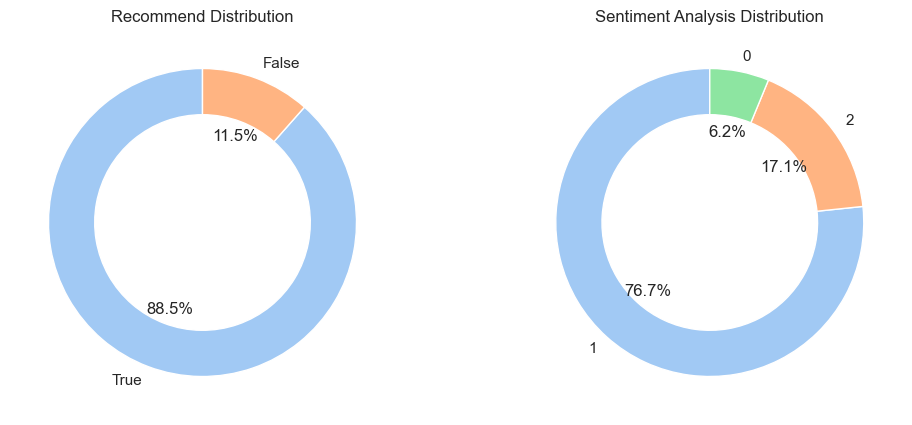

In [36]:
sentiment_counts_recommend = sentiment['recommend'].value_counts()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.set(style="whitegrid")
sns.set_palette("pastel")
plt.pie(sentiment_counts_recommend, labels=sentiment_counts_recommend.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Recommend Distribution')

sentiment_counts_analysis = sentiment['sentiment_analisys'].value_counts()

plt.subplot(1, 2, 2)
sns.set(style="whitegrid")
sns.set_palette("pastel")
plt.pie(sentiment_counts_analysis, labels=sentiment_counts_analysis.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Sentiment Analysis Distribution')

plt.show()

In [20]:
# There are some 'release_dates' missing in the steam_games 'release_date' df. They will be imputed with the date of the first review.
# For this, we need the cleaned date of review.

# Custom function adds ', 2020.' if there is no year (erasing first the final ".") and the 'Posted ' from the column 'posted'.
# The selection of 2020 is due to the fact that there are February 29th in the dataset (last leap year).
# Many other criteria would work as well, but with no further info from business, this is just one equally probable.


def add_year(row):
    row['posted']=row['posted'][7:]
    if ',' not in row['posted']:
        row['posted'] = row['posted'][:-1]

        return row['posted'] + ', 2020.'
    return row['posted']

sentiment['modified_date'] = sentiment.apply(add_year, axis=1)

In [21]:
sentiment[['posted','modified_date']]

,posted,modified_date
0,"Posted November 5, 2011.","November 5, 2011."
1,"Posted July 15, 2011.","July 15, 2011."
2,"Posted April 21, 2011.","April 21, 2011."
3,"Posted June 24, 2014.","June 24, 2014."
4,"Posted September 8, 2013.","September 8, 2013."
...,...,...
59300,Posted July 10.,"July 10, 2020."
59301,Posted July 8.,"July 8, 2020."
59302,Posted July 3.,"July 3, 2020."
59303,Posted July 20.,"July 20, 2020."


In [22]:
sentiment['modified_date'] = pd.to_datetime(sentiment['modified_date'], format='%B %d, %Y.', errors='coerce')

In [23]:
sentiment[['posted','modified_date']]

,posted,modified_date
0,"Posted November 5, 2011.",2011-11-05
1,"Posted July 15, 2011.",2011-07-15
2,"Posted April 21, 2011.",2011-04-21
3,"Posted June 24, 2014.",2014-06-24
4,"Posted September 8, 2013.",2013-09-08
...,...,...
59300,Posted July 10.,2020-07-10
59301,Posted July 8.,2020-07-08
59302,Posted July 3.,2020-07-03
59303,Posted July 20.,2020-07-20


In [24]:
sentiment[sentiment['modified_date'].isna()]


,user_id,posted,item_id,review,recommend,sentiment_analisys,modified_date


In [41]:
# We drop 'posted' and 'review' to "light" the file for further use.

sentiment.drop(['posted', 'review'], axis=1, inplace=True)
sentiment.to_csv('../light_data/function3.csv', index=False)

In [42]:
test = sentiment[['item_id', 'modified_date']]
test


,item_id,modified_date
0,1250,2011-11-05
1,22200,2011-07-15
2,43110,2011-04-21
3,251610,2014-06-24
4,227300,2013-09-08
...,...,...
59300,70,2020-07-10
59301,362890,2020-07-08
59302,273110,2020-07-03
59303,730,2020-07-20


In [26]:
sorted_df = test.sort_values(by=['item_id', 'modified_date'], ascending=[True, True])
sorted_df

,item_id,modified_date
5331,10,2011-05-18
43134,10,2012-04-07
22702,10,2012-07-24
35539,10,2012-09-27
45506,10,2013-07-05
...,...,...
23267,99900,2020-09-15
12393,99910,2011-12-28
8972,99910,2012-06-04
53052,99910,2014-07-25


In [31]:
# Now we are gonna get the first comment on each item_id to impute missing release_date in steam_games dataset, if necessary.

# Group by the 'item_id' column and sum the 'playtime_forever' column. Select the first row of 'modified_date' for each unique 'item_id'

date_imputer = sorted_df.groupby('item_id').apply(lambda x: x.iloc[0]).reset_index(drop=True)

In [32]:
date_imputer

,item_id,modified_date
0,10,2011-05-18
1,10090,2012-10-10
2,10130,2014-09-15
3,10140,2011-07-10
4,10150,2010-12-07
...,...,...
3677,99400,2014-03-29
3678,99700,2011-12-13
3679,99810,2013-01-24
3680,99900,2011-06-26


In [29]:
date_imputer.to_csv('../light_data/item_id&first_review_date.csv', index=False)